In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [241]:
def make_some_graphs(population1,population2,show_hist=False,bins=None,
                     show_boxplot=True,alpha=None,markersize=None ,show_legend=True,calc_pvalue=True):
    
    if calc_pvalue:
        (statistic,pvalue) = stats.ttest_ind(population1, population2)
    
    if show_boxplot:
        
        x = np.random.normal(1, 0.04, size=len(population1))
        plt.plot(x,population1,'ro',alpha=alpha,markersize=markersize,label='Standard')
        plt.boxplot([population1,population2])
        x = np.random.normal(2, 0.04, size=len(population2))
        plt.plot(x,population2,'bo',alpha=alpha,markersize=markersize,label='Variation')
        plt.legend()
        plt.ylabel('Result')
        title_text = 'Test results.'
        if calc_pvalue:
            title_text = title_text + ' (p-value = {0:.2f})'.format(pvalue)
        plt.title(title_text)    
        
        plt.show()
    if show_hist:
        plt.hist([population1,population2],histtype='step',bins=bins,color=['red','blue'])
        if calc_pvalue:
            plt.title('Distribution of results. (p-value = {0:.2f})'.format(pvalue))
        else:
            plt.title('Distribution of results')
        plt.show()
        
    if calc_pvalue:
        return pvalue
    else:
        return None

    
def simulate_experiment(u1=15,diff=0.5,sd1=0.5,sd2=0.5,n=2,show_full_distributions=True,num_runs=1):
    if show_full_distributions:
        print('If we do enough experiments, here would be the results')
        population1 = np.random.normal(u1, sd1, 1000)
        population2 = np.random.normal(u1+diff, sd2, 1000)
        make_some_graphs(population1,population2,calc_pvalue=False,show_hist=True,bins=100,show_boxplot=True,markersize=2,alpha=0.5)
        print('But we are only doing ', str(n), 'sample(s).')
    reject_H0_count=0
    for i in range(0,num_runs):
        population1 = np.random.normal(u1, sd1, n)
        population2 = np.random.normal(u1+diff, sd2, n)
        if n == 1:
            make_some_graphs(population1,population2,calc_pvalue=False)
        else:
            p_value = make_some_graphs(population1,population2,calc_pvalue=True,show_boxplot=True)
            if p_value < 0.05:
                reject_H0_count+=1
                
    if n != 1:
        reject_H0_rate = reject_H0_count / num_runs * 100
        fail_reject_H0_rate = 100 - reject_H0_rate
        print('Percentage of times H0 is rejected = ', '{0:0.1f}%'.format(reject_H0_rate))
    if diff !=0:
        print('In this case, we know H0 is false, so we made a Type II error {0:0.1f}% of the time'.format(fail_reject_H0_rate))
    else:
        print('In this case, we know H0 is true, so we made a Type I error {0:0.1f}% of the time'.format(reject_H0_rate))

If we do enough experiments, here would be the results


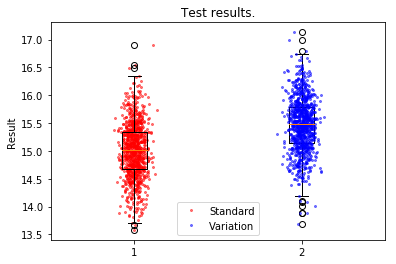

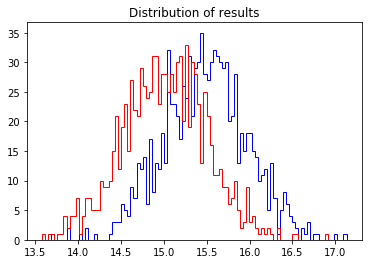

But we are only doing  2 sample(s).


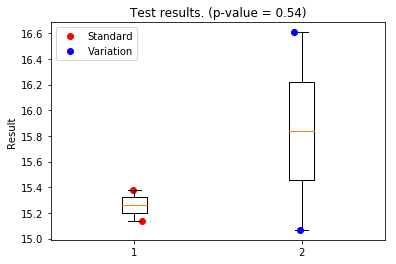

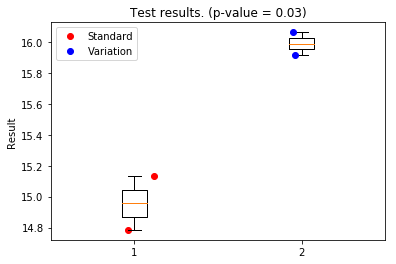

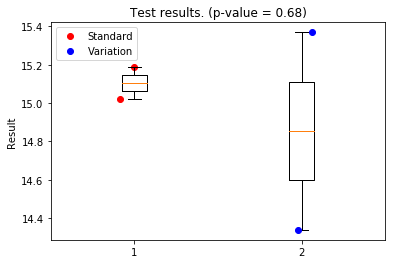

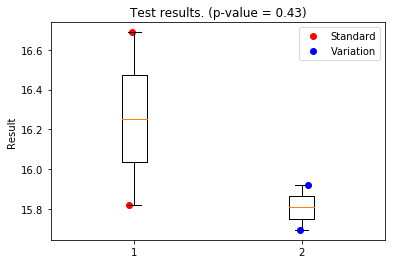

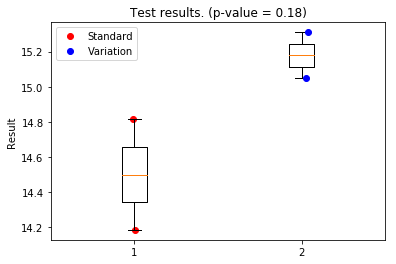

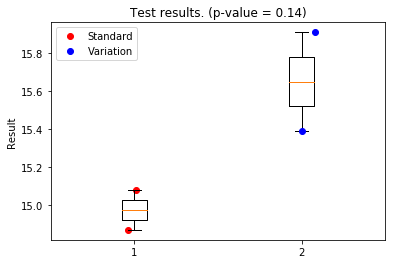

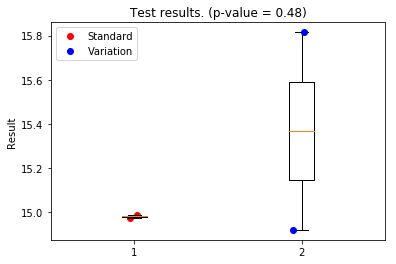

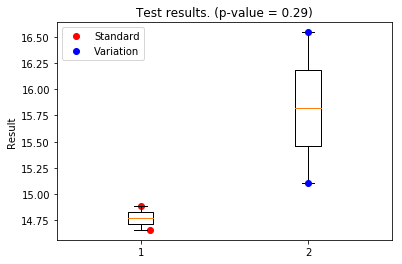

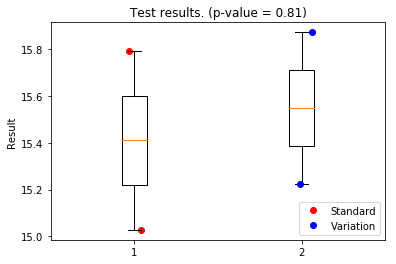

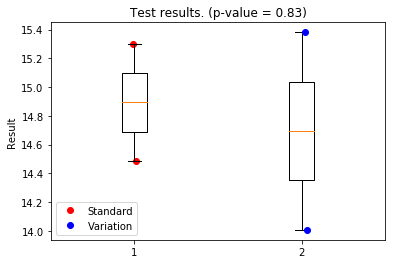

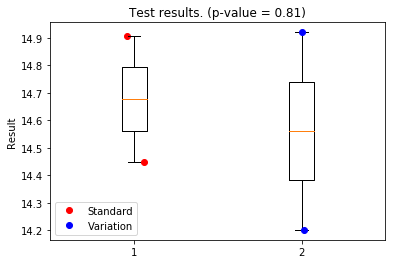

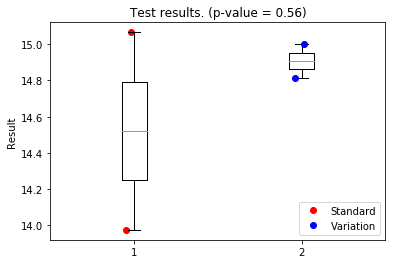

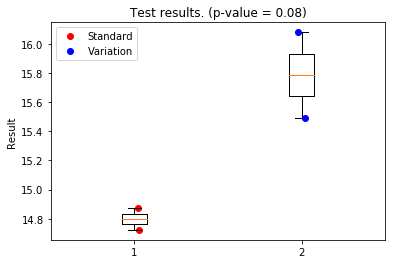

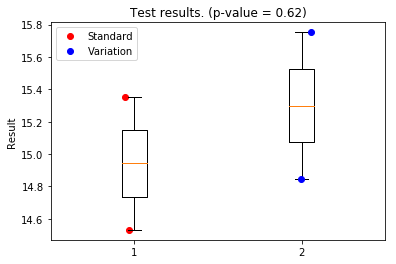

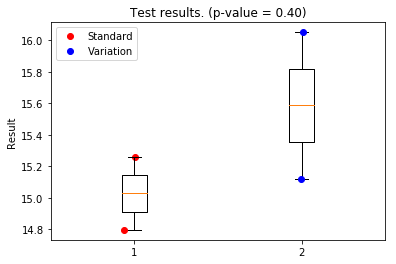

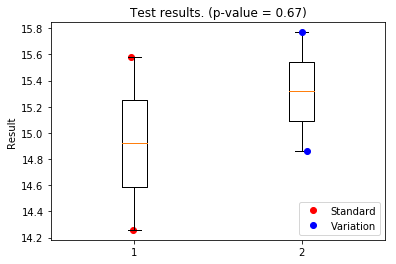

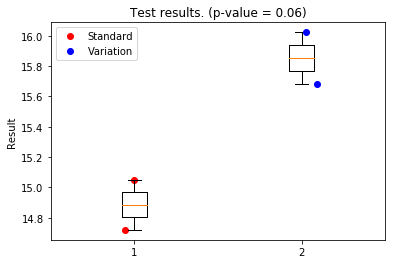

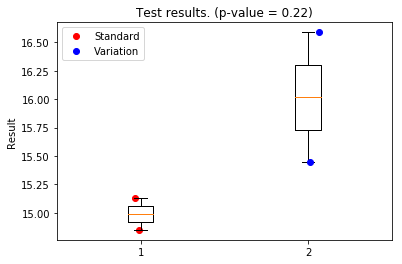

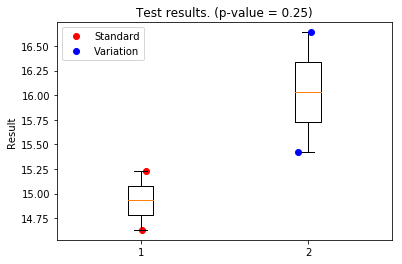

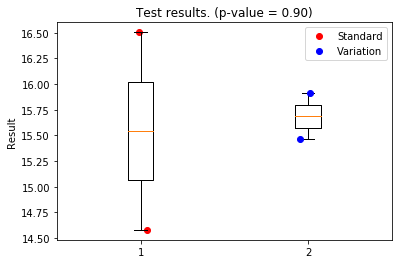

Percentage of times H0 is rejected =  5.0%
In this case, we know H0 is false, so we made a Type II error in 95.0% of the time


In [238]:
# 2 samples of each population. There is a real difference in means of 0.5. If p > 0.05, then we fail to reject H0. This is a Type II error. 

simulate_experiment(u1=15,diff=0.5,sd1=0.5, sd2=0.5, n=2, num_runs=20)


If we do enough experiments, here would be the results


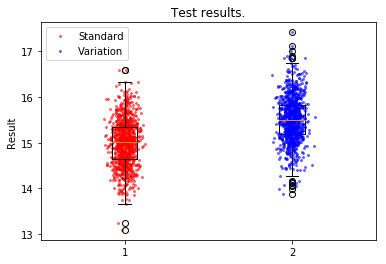

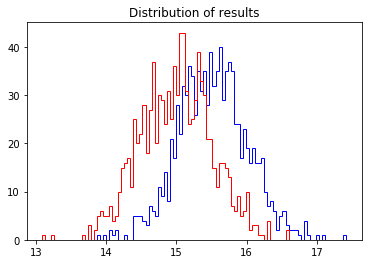

But we are only doing  4 sample(s).


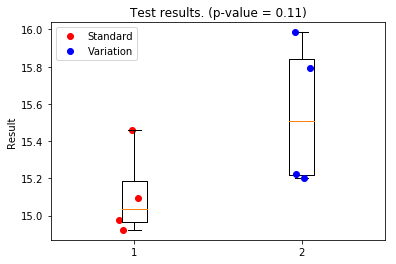

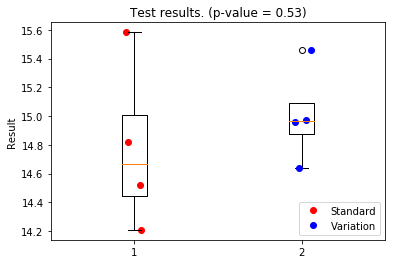

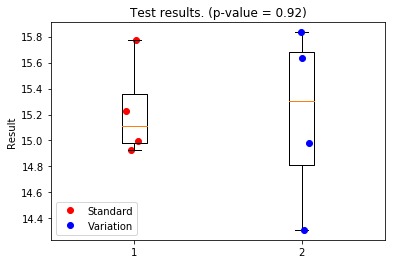

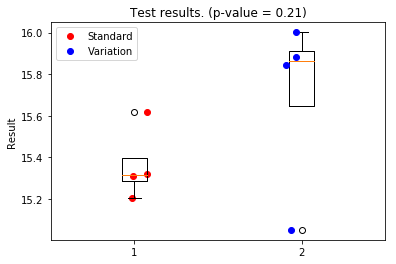

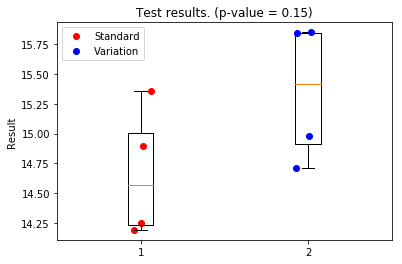

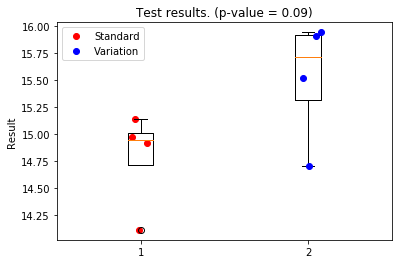

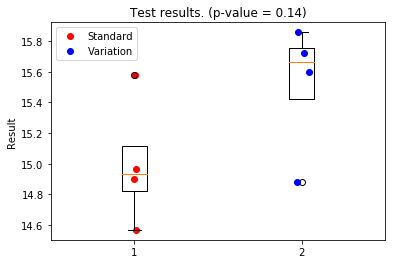

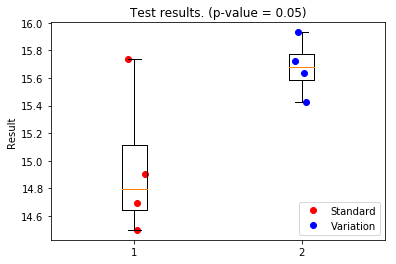

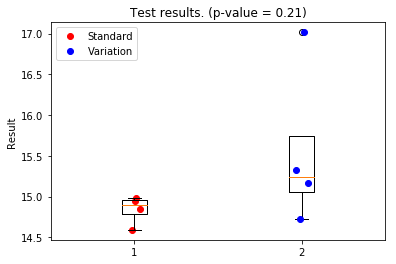

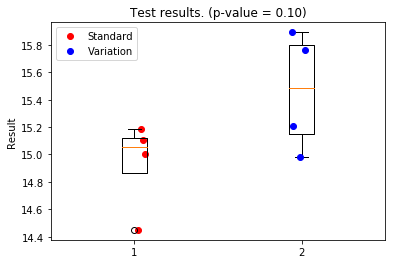

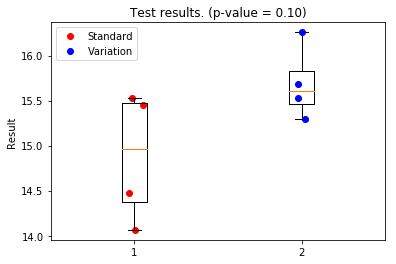

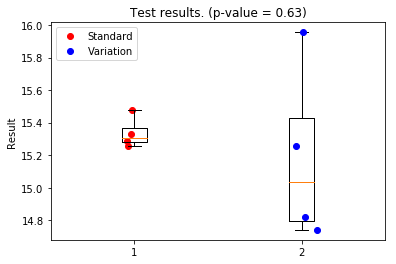

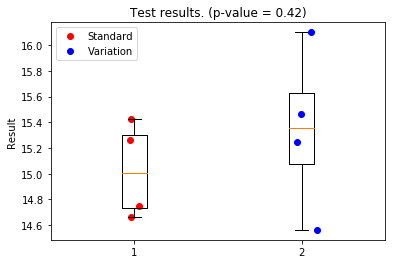

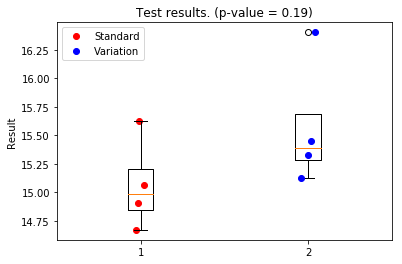

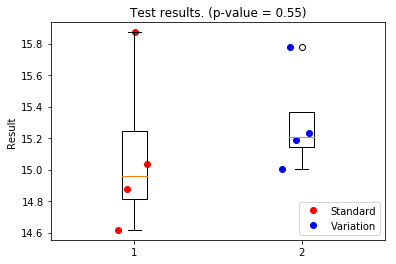

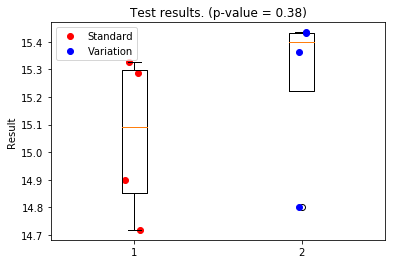

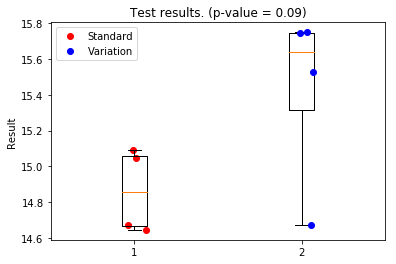

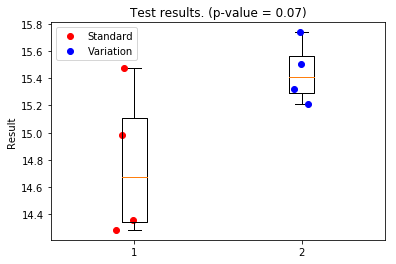

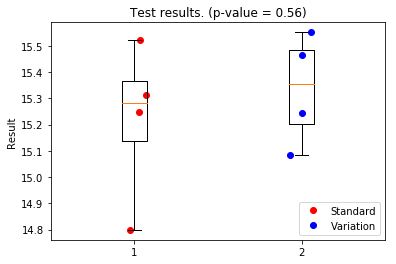

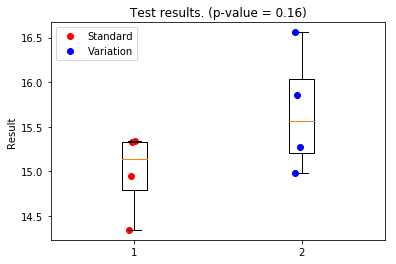

Percentage of times H0 is rejected =  5.0%
In this case, we know H0 is false, so we made a Type II error in 95.0% of the time


In [239]:
simulate_experiment(u1=15,diff=0.5,sd1=0.5, sd2=0.5, n=4, num_runs=20)

If we do enough experiments, here would be the results


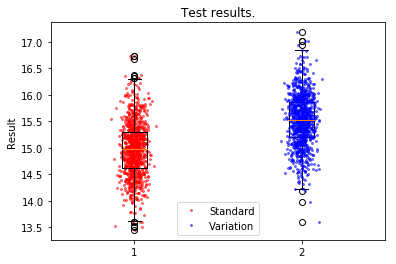

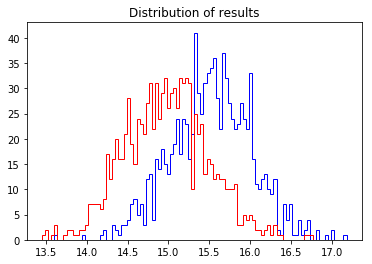

But we are only doing  10 sample(s).


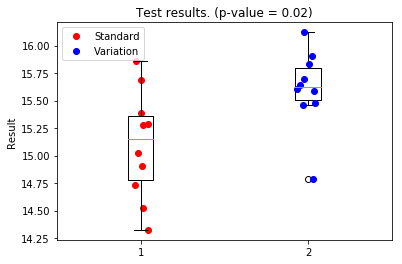

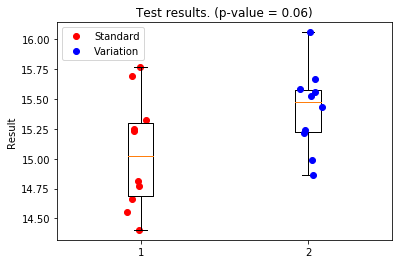

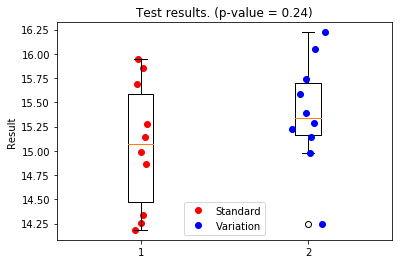

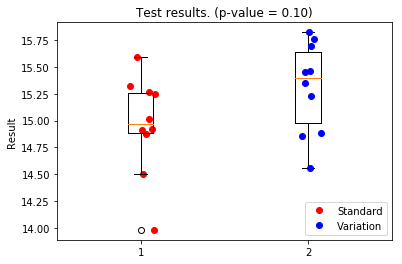

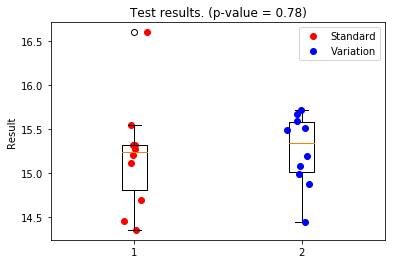

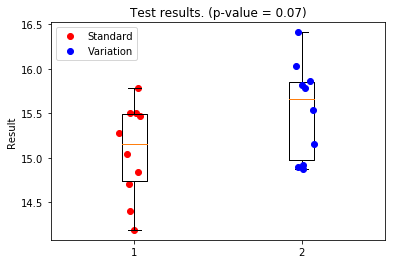

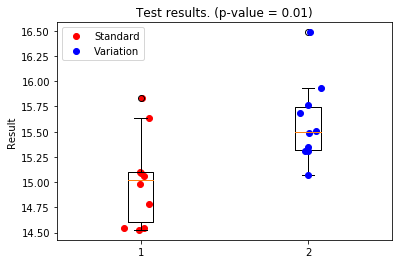

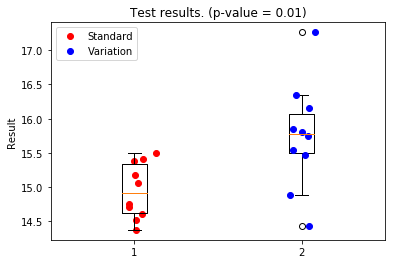

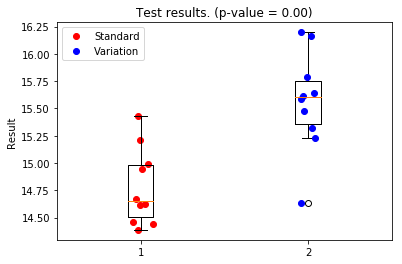

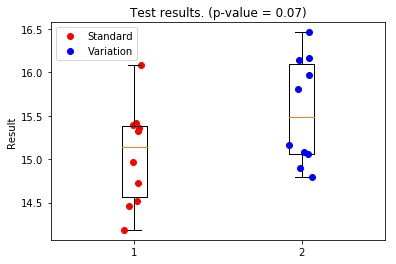

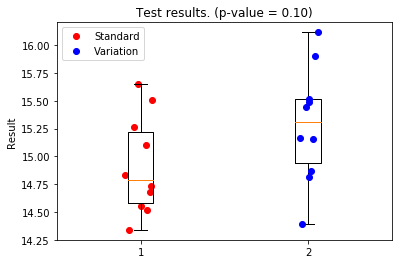

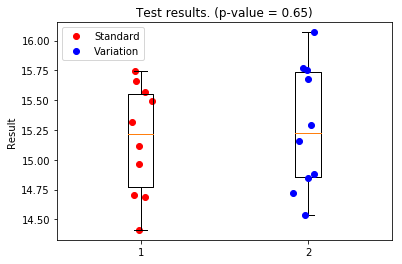

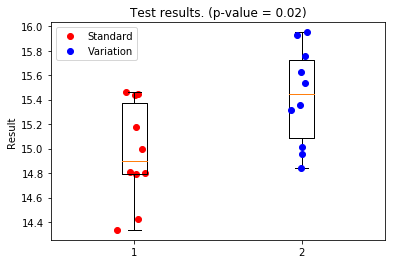

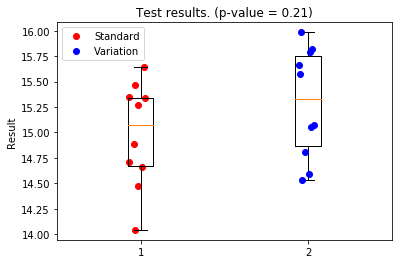

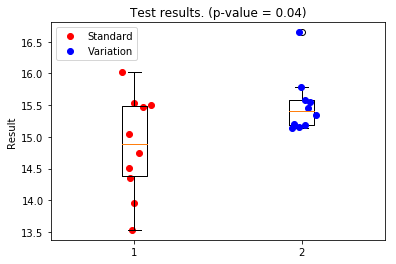

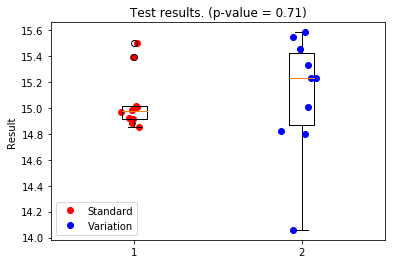

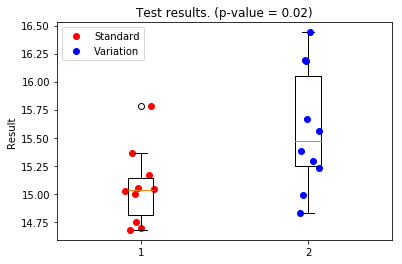

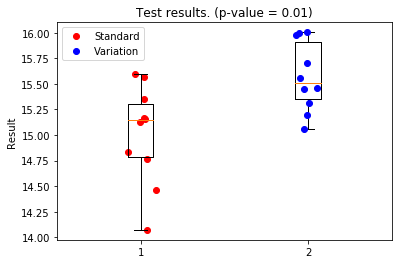

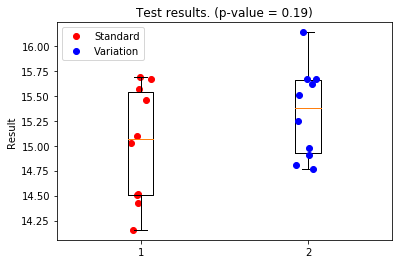

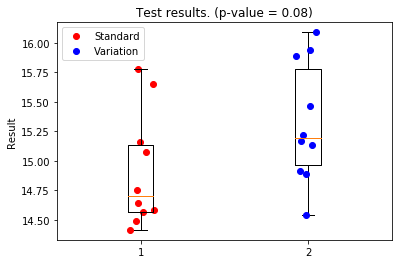

Percentage of times H0 is rejected =  40.0%
In this case, we know H0 is false, so we made a Type II error in 60.0% of the time


In [240]:
simulate_experiment(u1=15,diff=0.5,sd1=0.5, sd2=0.5, n=10, num_runs=20)

If we do enough experiments, here would be the results


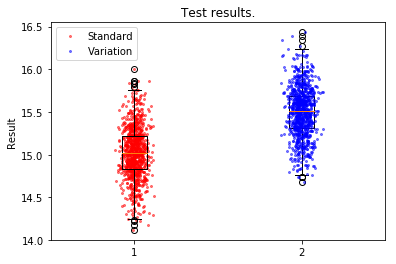

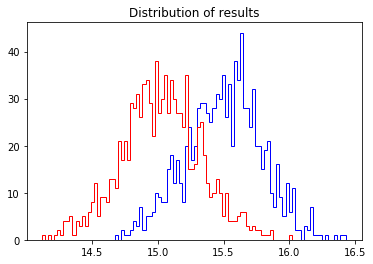

But we are only doing  10 sample(s).


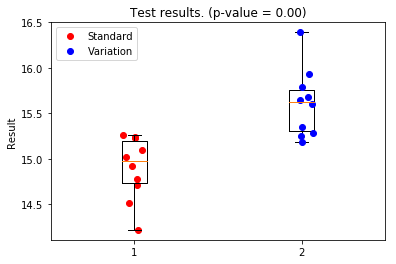

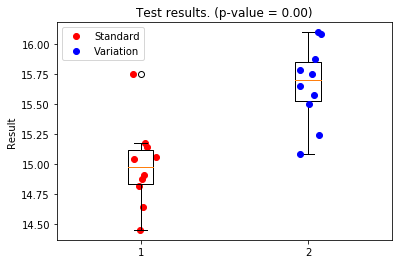

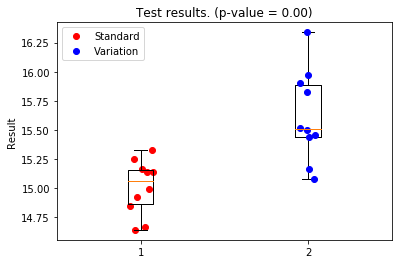

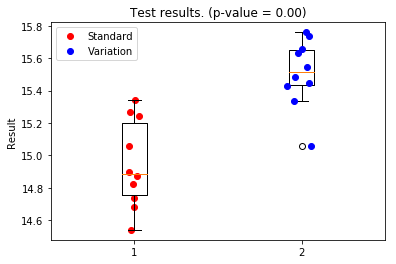

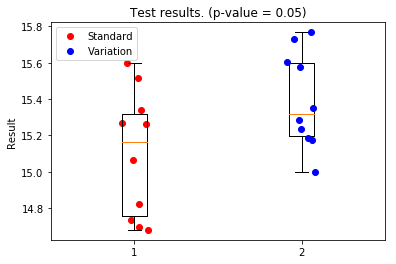

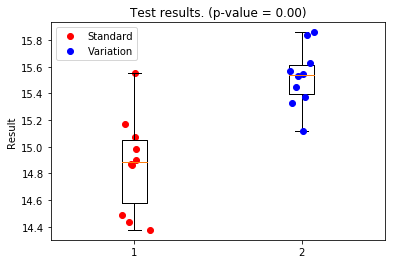

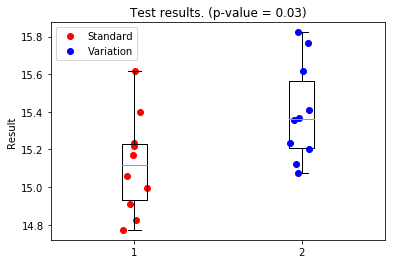

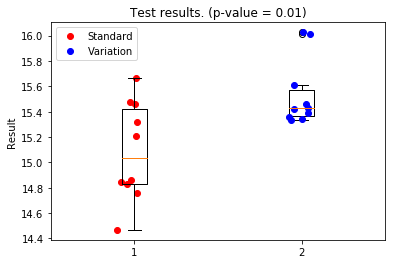

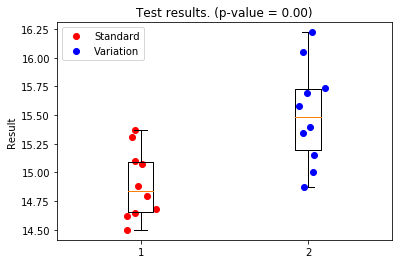

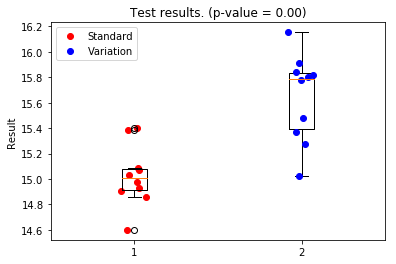

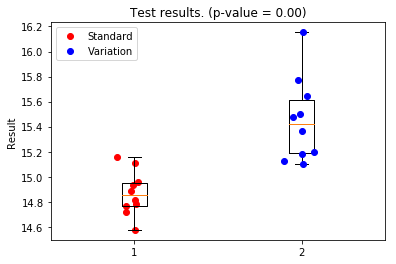

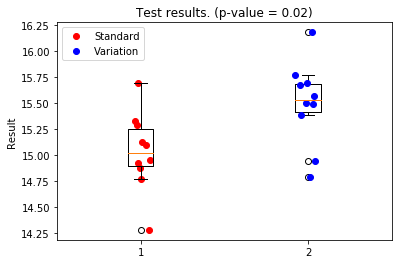

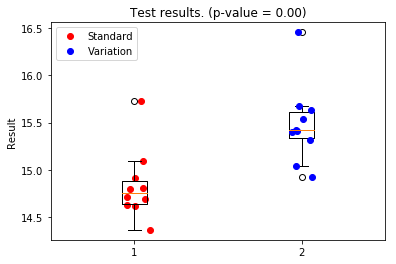

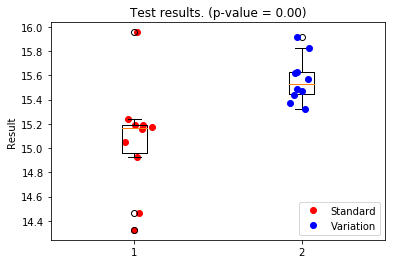

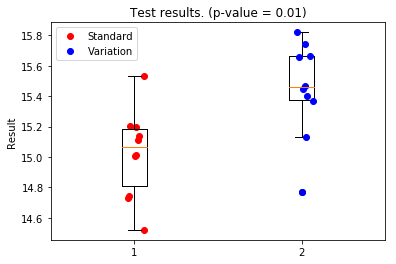

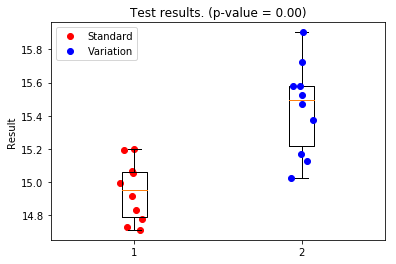

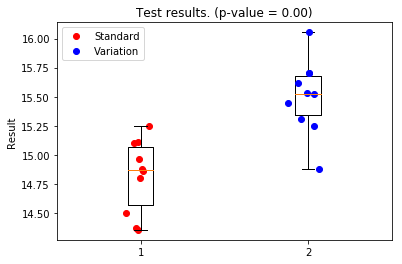

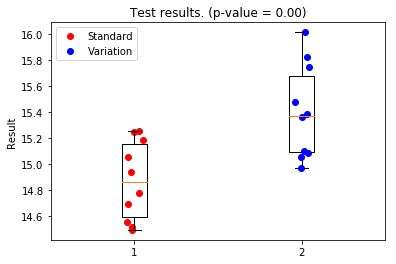

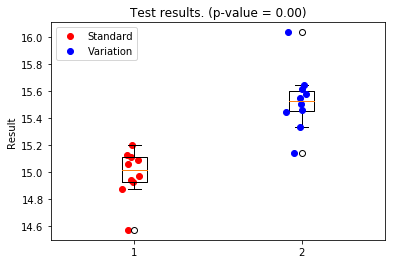

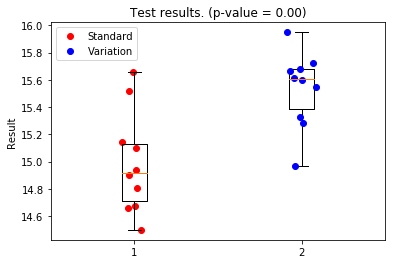

Percentage of times H0 is rejected =  100.0%
In this case, we know H0 is false, so we made a Type II error 0.0% of the time


In [242]:
# One way to improve your chances of disproving H0
# Reduce the amount of noise (uncontrolled variation)
simulate_experiment(u1=15,diff=0.5,sd1=0.3, sd2=0.3, n=10, num_runs=20)


    

If we do enough experiments, here would be the results


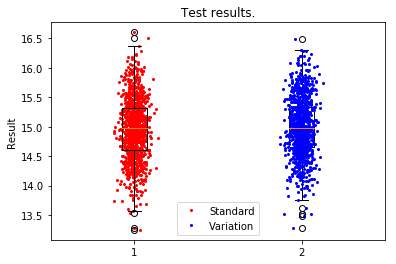

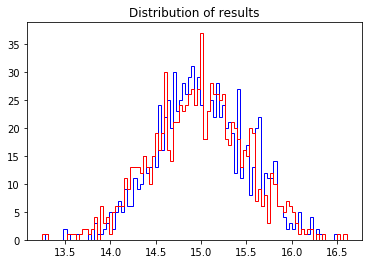

But we are only doing  2 sample(s).


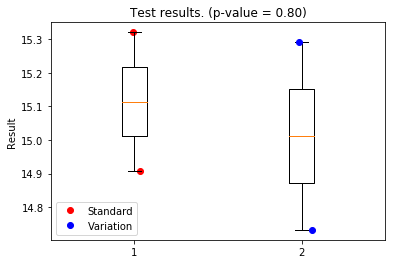

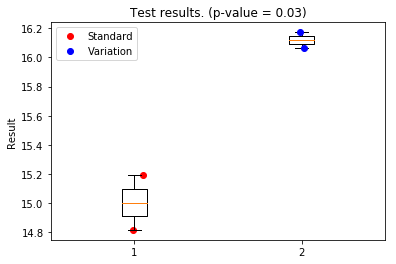

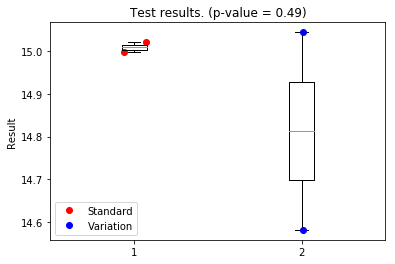

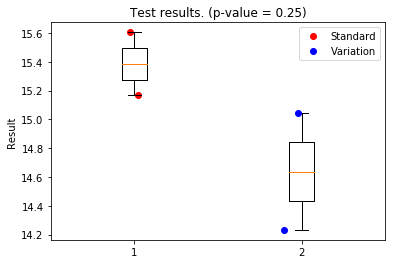

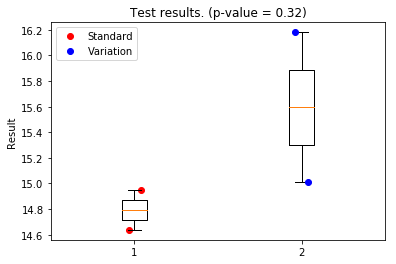

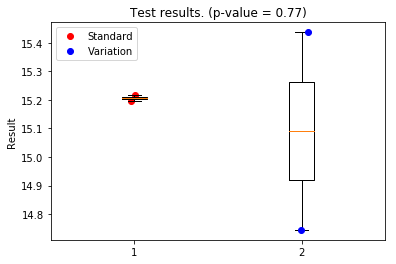

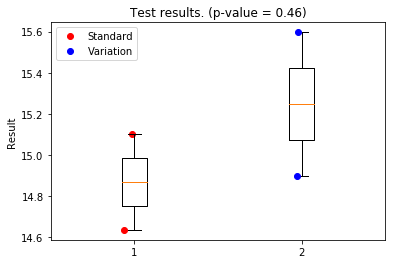

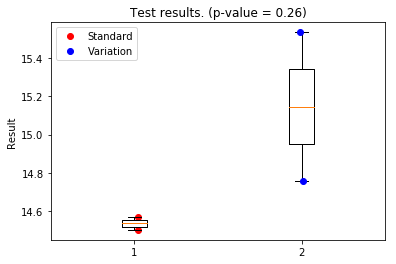

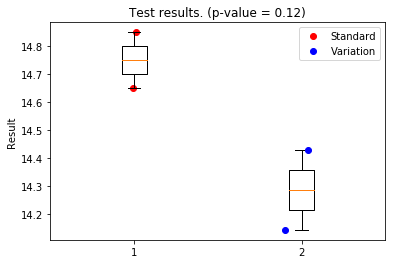

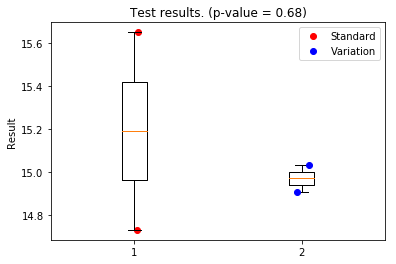

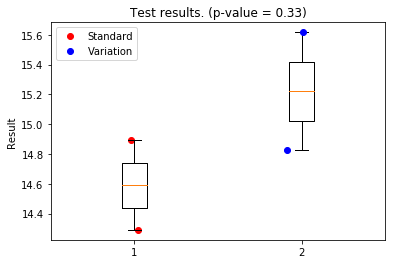

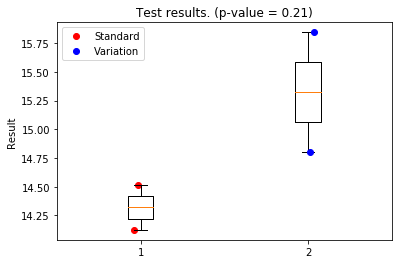

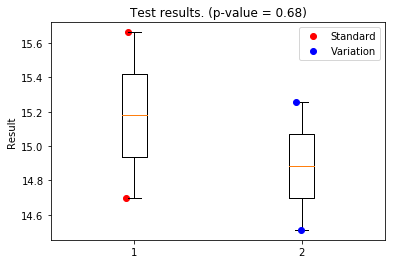

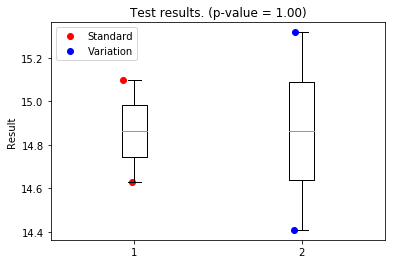

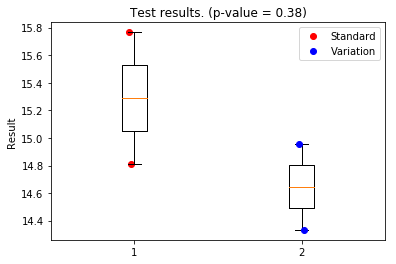

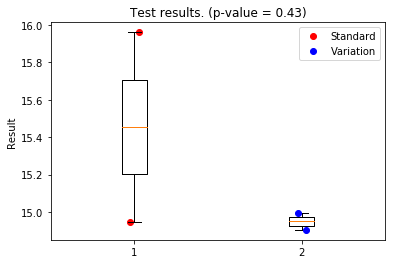

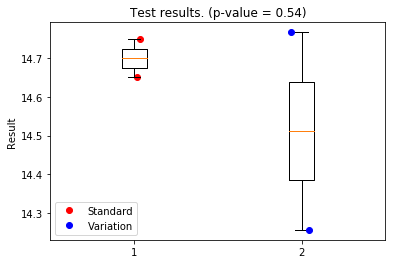

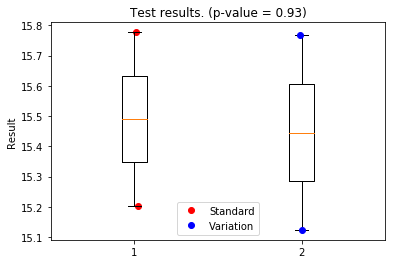

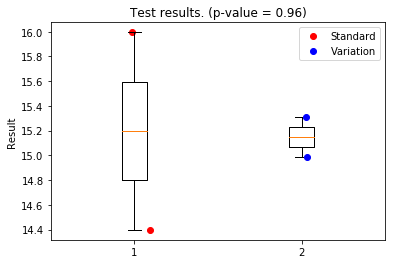

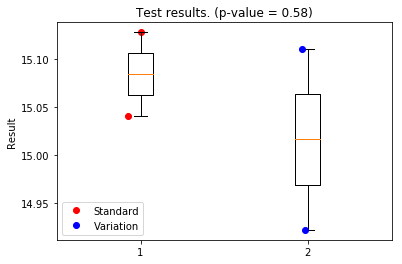

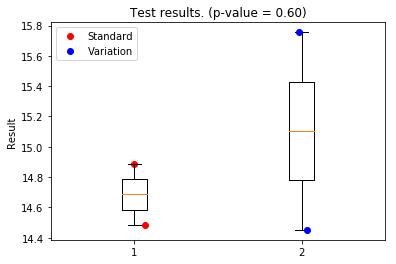

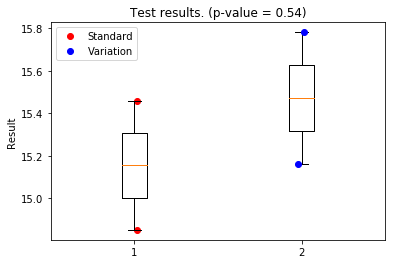

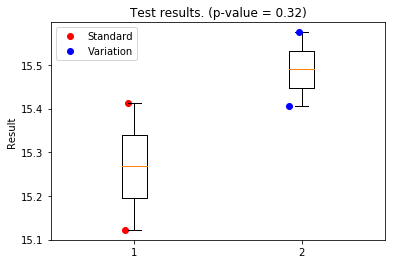

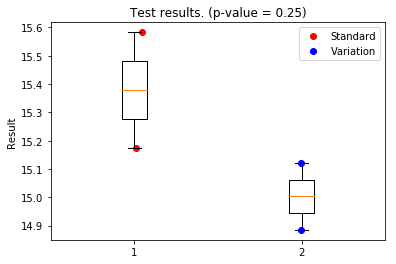

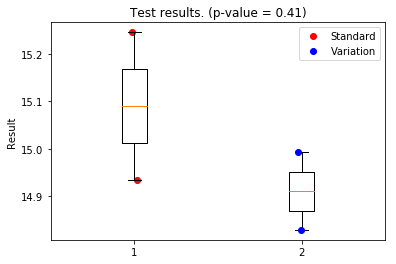

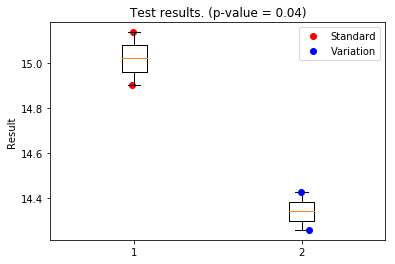

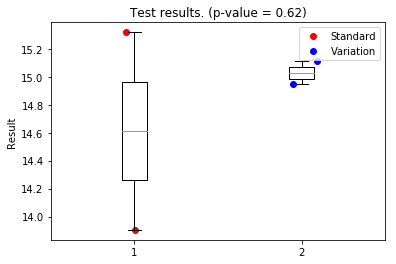

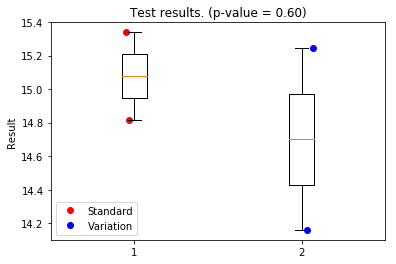

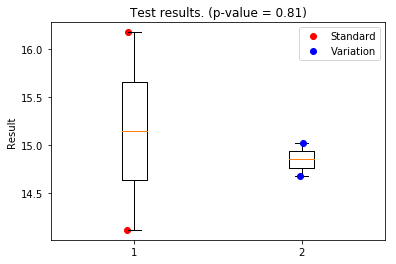

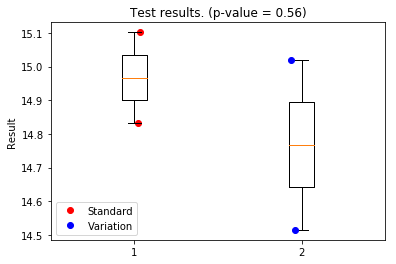

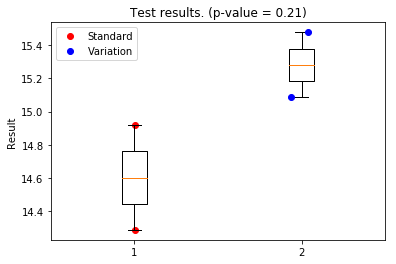

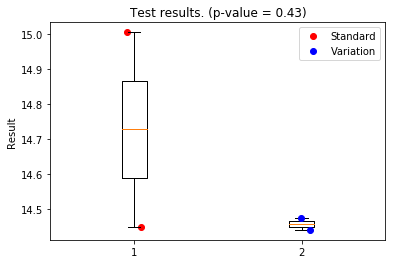

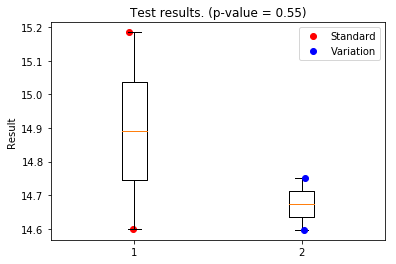

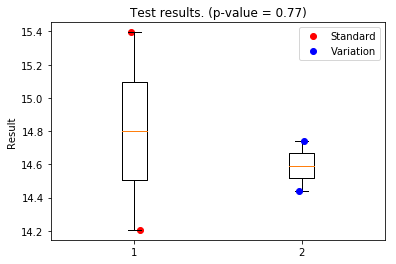

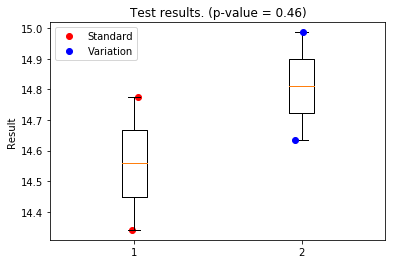

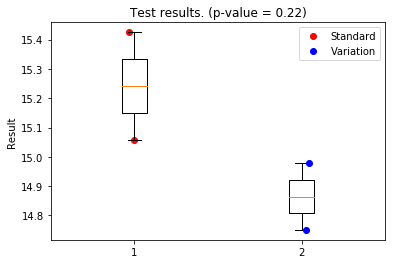

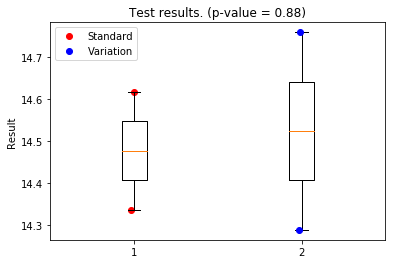

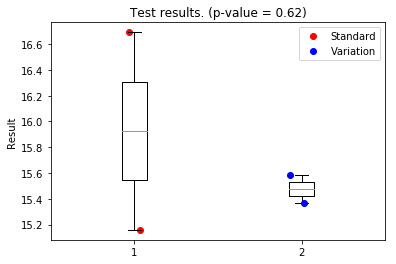

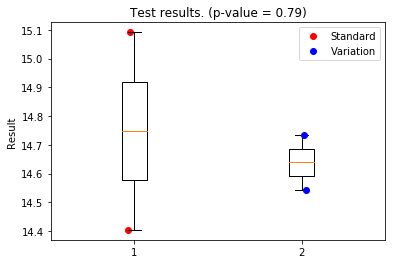

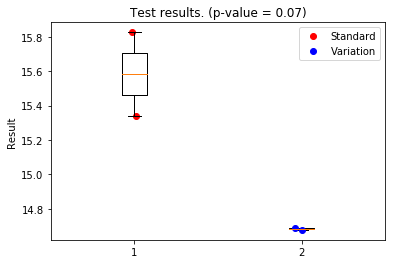

Percentage of times H0 is rejected =  5.0%
In this case, we know H0 is true, so we made a Type I error in 5.0% of the time


In [225]:

simulate_experiment(u1=15,diff=0,sd1=0.5, sd2=0.5, n=2, num_runs=40)

If we do enough experiments, here would be the results


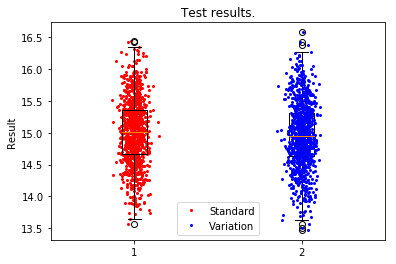

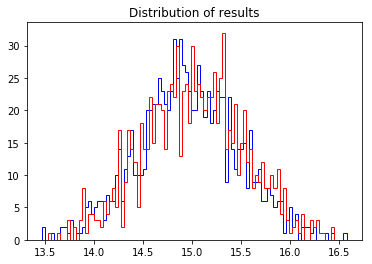

But we are only doing  50 sample(s).


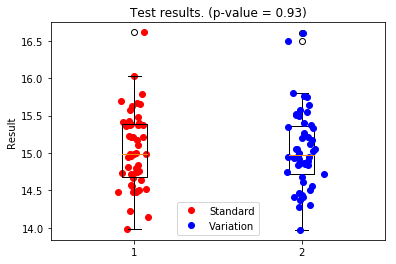

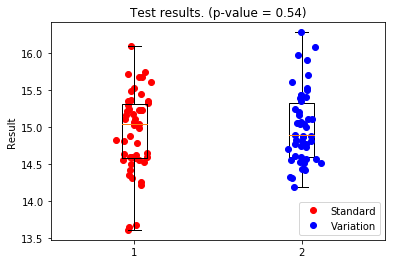

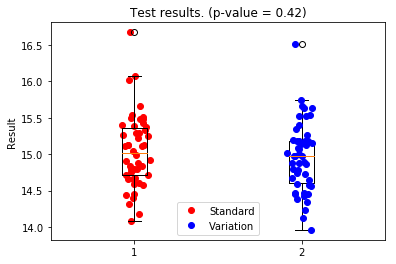

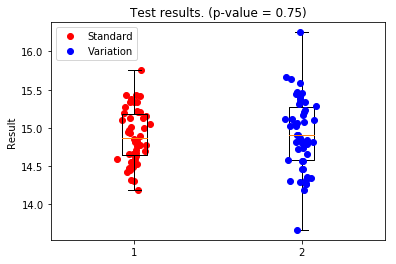

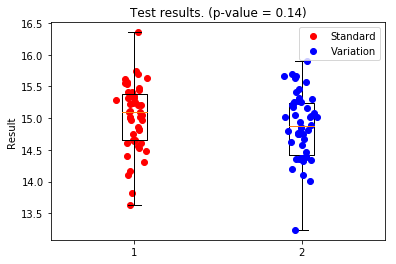

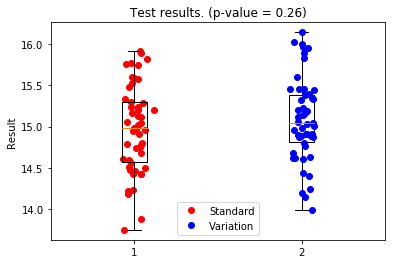

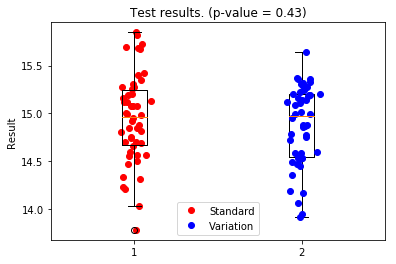

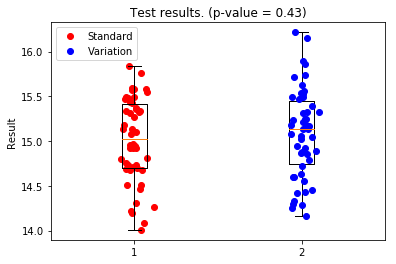

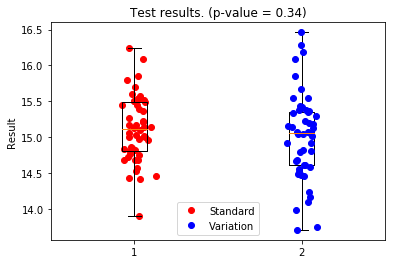

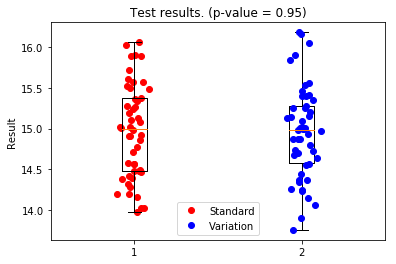

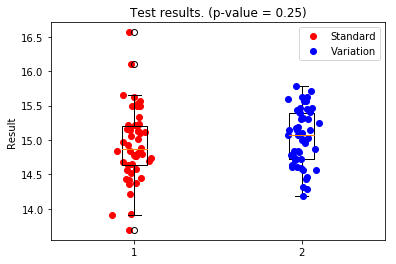

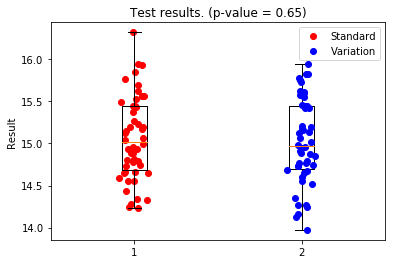

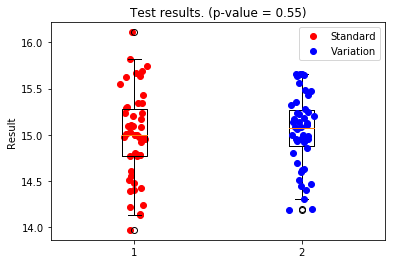

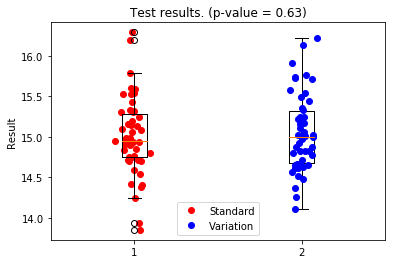

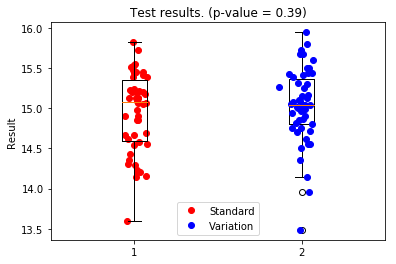

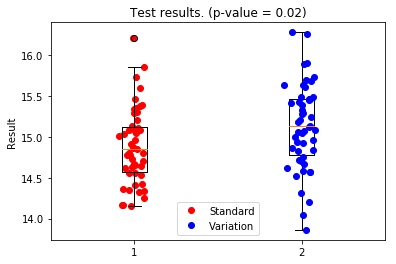

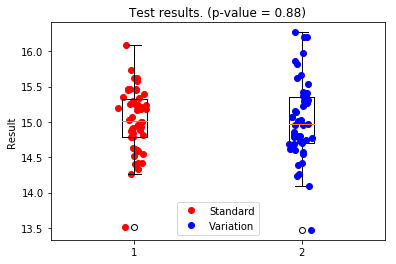

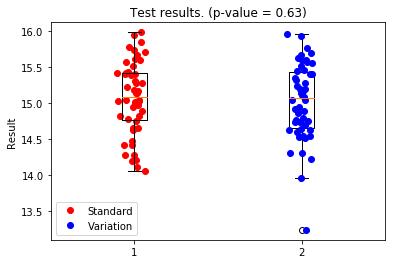

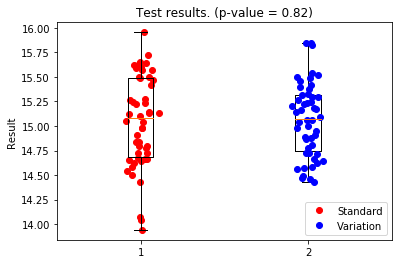

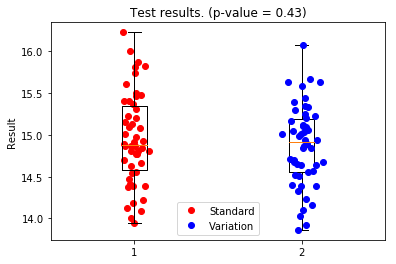

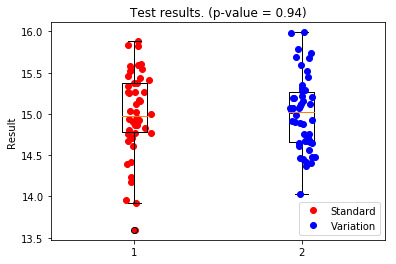

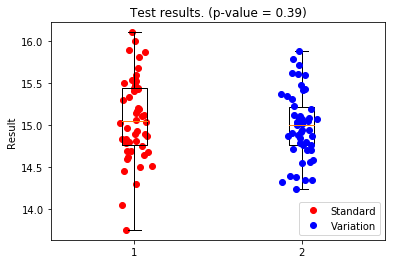

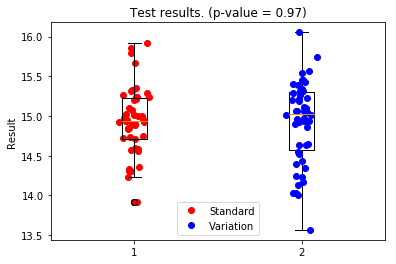

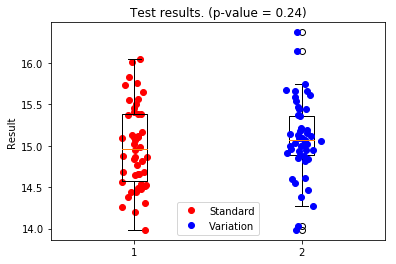

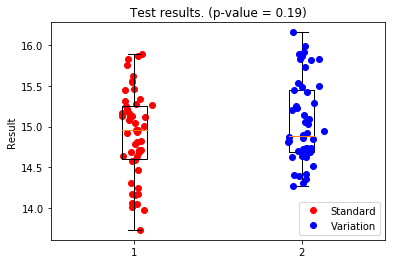

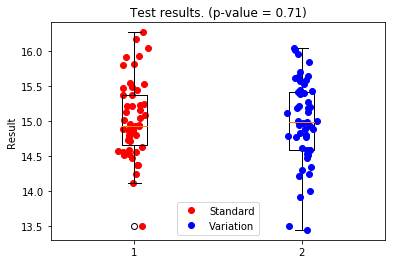

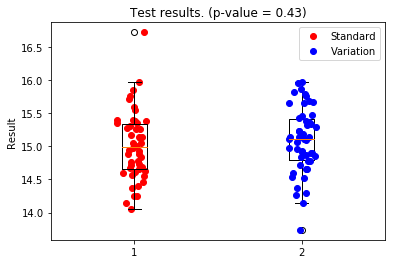

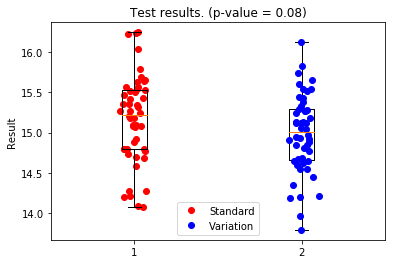

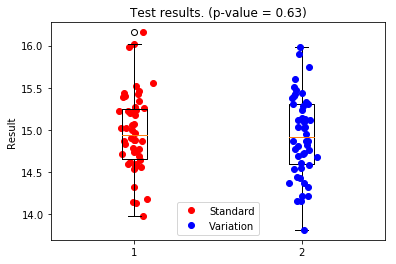

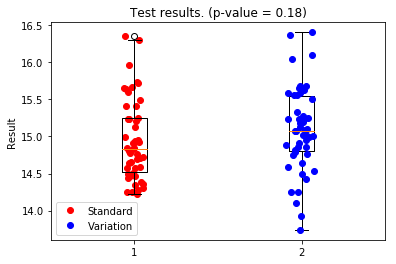

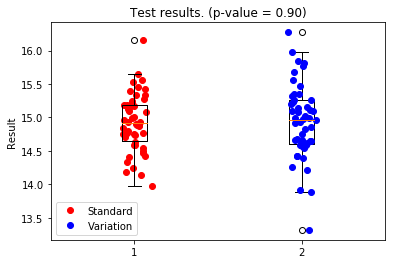

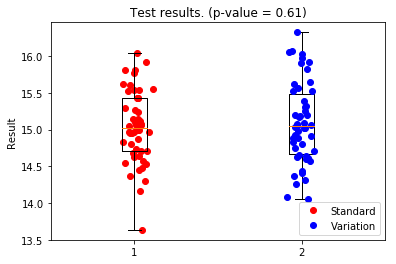

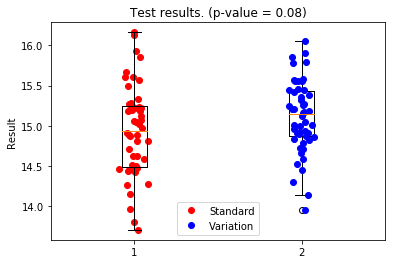

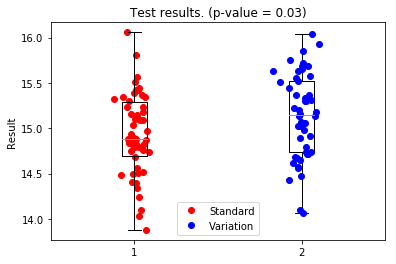

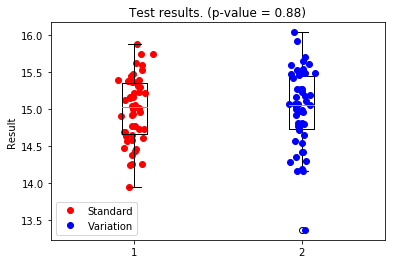

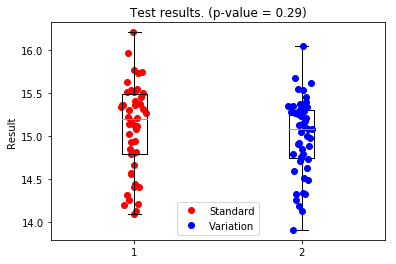

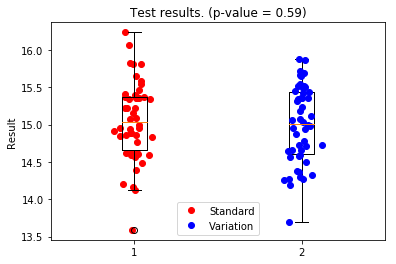

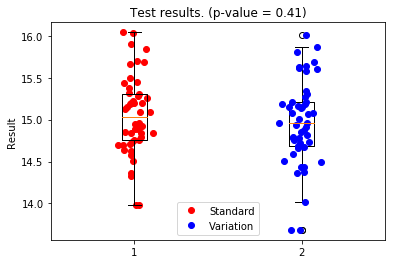

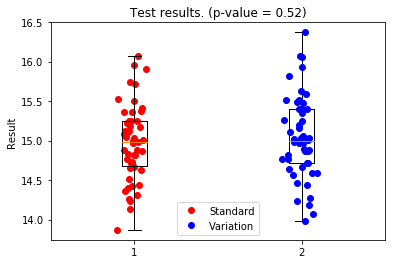

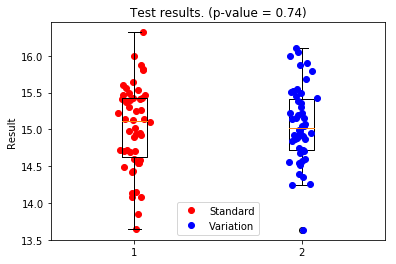

Percentage of times H0 is rejected =  5.0%
In this case, we know H0 is true, so we made a Type I error in 5.0% of the time


In [226]:

simulate_experiment(u1=15,diff=0,sd1=0.5, sd2=0.5, n=50, num_runs=40)